<a href="https://colab.research.google.com/github/dianaayusukma27/HeartFailureClassificationFuzzyKnn/blob/main/Fuzzy_KNN_Implementasi_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KELOMPOK 4

Aurelia Sukianto - 205150200111068

Diana Ayu Sukma Putri - 205150201111056

Anasya Miftakus Sururi - 205150201111013

Putri Rahmawati - 205150201111022

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import scipy
import sklearn
import csv

#Import Data

In [ ]:
! wget https://raw.githubusercontent.com/ptri16/PPM/main/heart.csv

--2022-05-23 01:28:47--  https://raw.githubusercontent.com/ptri16/PPM/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.003s  

2022-05-23 01:28:47 (11.8 MB/s) - ‘heart.csv’ saved [35921/35921]



In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#Pre-proses Data

In [ ]:
def imputasi(df_input, columnName):
  list_columns = df_input.columns
  class_column = list_columns[-1]
  df_input[columnName] = df_input[columnName].fillna(df_input.groupby(class_column)[columnName].transform('mean'))
  return df_input

In [ ]:
def normalisasi(dataImputasi):
  data_normalisasi = dataImputasi.copy()
  list_column = ['Cholesterol','RestingBP','Age','MaxHR','Oldpeak']
  for column in list_column:
   mean = np.mean(data_normalisasi[column])
   std = np.std(data_normalisasi[column])
   data_normalisasi[column] = (data_normalisasi[column] - mean) / std
  
  return data_normalisasi

##IMPUTASI

In [ ]:
print(data.isnull().values.any())
print(pd.isna(data).values.any())

False
False


In [ ]:
heart_copy = data.copy()

In [ ]:
kondisi1 = heart_copy['Age'] == 0
kondisi2 = heart_copy['RestingBP'] == 0
kondisi3 = heart_copy['Cholesterol'] == 0
heart_copy.loc[kondisi2]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
##Untuk missing value dihandle pakai imputasi dengan diganti nilai mean dari tiap kategori
heart_copy['Cholesterol'] = heart_copy['Cholesterol'].replace(0, np.NaN)
heart_copy['RestingBP'] = heart_copy['RestingBP'].replace(0, np.NaN)

In [ ]:
heart_imputasi = imputasi(heart_copy, 'Cholesterol')
heart_imputasi = imputasi(heart_imputasi,'RestingBP')

In [ ]:
kondisi = heart_imputasi['RestingBP'] == 0
heart_imputasi.loc[kondisi]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


##NORMALISASI

In [ ]:
heart_normalisasi = normalisasi(heart_imputasi)
heart_normalisasi.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.414735,0.813998,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.527067,-1.229040,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.141432,0.701537,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.303501,-0.591762,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.970901,-0.947888,0,Normal,-0.581981,N,-0.832432,Up,0


In [ ]:
heart_normalisasi.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,918.000000
mean,-1.460947e-16,-5.494274e-16,2.101055e-14,0.233115,4.235295e-16,1.935029e-17,0.553377
std,1.000545e+00,1.000545e+00,1.000545e+00,0.423046,1.000545e+00,1.000545e+00,0.497414
min,-2.706015e+00,-2.922262e+00,-3.009670e+00,0.000000,-3.018469e+00,-3.271482e+00,0.000000
25%,-6.906294e-01,-6.975976e-01,-5.917623e-01,0.000000,-6.605778e-01,-8.324324e-01,0.000000
50%,5.188098e-02,-1.414316e-01,8.300258e-02,0.000000,4.678968e-02,-2.695748e-01,1.000000
75%,6.883185e-01,4.147345e-01,4.016416e-01,0.000000,7.541571e-01,5.747115e-01,1.000000
max,2.491558e+00,3.751731e+00,6.699447e+00,1.000000,2.561874e+00,4.983762e+00,1.000000


##CONVERT DATA

In [ ]:
#Check tipe data
heart_normalisasi.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Mengganti nilai Label menjadi Negative dan Positive agar lebih mudah dibaca

In [ ]:
heart_convert = heart_normalisasi.copy()
heart_convert['HeartDisease'] = heart_convert['HeartDisease'].replace([0],'Negative')
heart_convert['HeartDisease'] = heart_convert['HeartDisease'].replace([1],'Positive')
heart_label = heart_convert.pop('HeartDisease')

###Label Encoding
Untuk data dengan jumlah kategori 2, digunakan LabelEncoder 

In [ ]:
# Importing LabelEncoder from Sklearn
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(heart_convert['ExerciseAngina'])
label_sex = le.fit_transform(heart_convert['Sex'])
heart_convert['ExerciseAngina'] = label
heart_convert['Sex'] = label_sex
heart_convert.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,ATA,0.414735,0.813998,0,Normal,1.382928,0,-0.832432,Up
1,-0.478484,0,NAP,1.527067,-1.229040,0,Normal,0.754157,0,0.105664,Flat
2,-1.751359,1,ATA,-0.141432,0.701537,0,ST,-1.525138,0,-0.832432,Up
3,-0.584556,0,ASY,0.303501,-0.591762,0,Normal,-1.132156,1,0.574711,Flat
4,0.051881,1,NAP,0.970901,-0.947888,0,Normal,-0.581981,0,-0.832432,Up


###Dummy Variable Encoding
Untuk data dengan jumlah kategori>2 digunakan metode Dummy Variable Encoding

In [ ]:
df = pd.get_dummies(heart_convert, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], prefix=['Chest','ECG','ST'])
df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Chest_ASY,Chest_ATA,Chest_NAP,Chest_TA,ECG_LVH,ECG_Normal,ECG_ST,ST_Down,ST_Flat,ST_Up
0,-1.433140,1,0.414735,0.813998,0,1.382928,0,-0.832432,0,1,0,0,0,1,0,0,0,1
1,-0.478484,0,1.527067,-1.229040,0,0.754157,0,0.105664,0,0,1,0,0,1,0,0,1,0
2,-1.751359,1,-0.141432,0.701537,0,-1.525138,0,-0.832432,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0,0.303501,-0.591762,0,-1.132156,1,0.574711,1,0,0,0,0,1,0,0,1,0
4,0.051881,1,0.970901,-0.947888,0,-0.581981,0,-0.832432,0,0,1,0,0,1,0,0,0,1
5,-1.539213,1,-0.697598,1.751171,0,1.304332,0,-0.832432,0,0,1,0,0,1,0,0,0,1
6,-0.902775,0,-0.141432,-0.160663,0,1.304332,0,-0.832432,0,1,0,0,0,1,0,0,0,1
7,0.051881,1,-1.253764,-0.704223,0,0.203982,0,-0.832432,0,1,0,0,0,1,0,0,0,1
8,-1.751359,1,0.414735,-0.722967,0,-0.267596,1,0.574711,1,0,0,0,0,1,0,0,1,0
9,-0.584556,0,-0.697598,0.720281,0,-0.660578,0,-0.832432,0,1,0,0,0,1,0,0,0,1


In [ ]:
##Menggabungkan kembali label dengan data yang di convert
heart_finish = pd.concat([df, heart_label],axis = 1)
heart_finish.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Chest_ASY,Chest_ATA,Chest_NAP,Chest_TA,ECG_LVH,ECG_Normal,ECG_ST,ST_Down,ST_Flat,ST_Up,HeartDisease
0,-1.433140,1,0.414735,0.813998,0,1.382928,0,-0.832432,0,1,0,0,0,1,0,0,0,1,Negative
1,-0.478484,0,1.527067,-1.229040,0,0.754157,0,0.105664,0,0,1,0,0,1,0,0,1,0,Positive
2,-1.751359,1,-0.141432,0.701537,0,-1.525138,0,-0.832432,0,1,0,0,0,0,1,0,0,1,Negative
3,-0.584556,0,0.303501,-0.591762,0,-1.132156,1,0.574711,1,0,0,0,0,1,0,0,1,0,Positive
4,0.051881,1,0.970901,-0.947888,0,-0.581981,0,-0.832432,0,0,1,0,0,1,0,0,0,1,Negative


#Implementasi 

In [ ]:
#Metode untuk mengecek akurasi
def accuration(label_uji, prediksi):
  sum = 0;
  for k in range(label_uji.shape[0]):
    if prediksi[k]==label_uji.iloc[k]:
      sum = sum+1

  akurasi = (sum/label_uji.shape[0]) * 100
  return akurasi

##Split Data Latih & Uji

In [ ]:
##Dari 950 data diambil 400 sampel
df_heart = heart_finish.sample(n=400, random_state=42)

In [ ]:
##Bagi data latih 75% dan data uji 25%
#data latih = 300; data uji = 100
from sklearn.model_selection import train_test_split
data_latih, data_uji = train_test_split(df_heart, test_size=0.25, random_state=101)

In [ ]:
##Membuat Label data
label_latih = data_latih.pop('HeartDisease')
label_uji = data_uji.pop('HeartDisease')

##Euclidean Distance

In [ ]:
#Euclidean Distance
def jarakEu(data1, data2):
  jarak = np.square(data1-data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

In [ ]:
##KNN
from collections import Counter

def knn(k, datalatih, labellatih, datauji):
  jarak = np.array([jarakEu(datalatih.iloc[x], datauji) for x in range (datalatih.shape[0])])
  indeks_k_minimum = jarak.argsort()[:k] ##ini ngambil indeks kelasnya
  k_kelas = labellatih.iloc[indeks_k_minimum].to_numpy() #ini ngambil kelasnya berdasarkan indeks_k_minimum
  counter = Counter(k_kelas) ##ini buat ngitung nilai jumlah berapa kali muncul kelasnya.
  kelas_uji = counter.most_common(1)[0][0]
  return kelas_uji

In [ ]:
#KNN MUlTI
def knn_multi(k, datalatih, labellatih, datauji):
  kelas_hasil = []
  for i in range(datauji.shape[0]):
    kelas_hasil.append(knn(k, datalatih, labellatih, datauji.iloc[i]))
  return kelas_hasil

##Fuzzy

###Inisialisasi Fuzzi

In [ ]:
def inisialisasi(label_latih):
  ##INI PERBAIKI LAGI MISALNYA GAK ADA KEY POSITIVE GIMANA?
  inisialisasi = {}
  counter = Counter(label_latih)
  k = label_latih.shape[0]
  for key,value in counter.items():
    U1 = 0.51 + (value/k) * 0.49
    U0 = (value/k) * 0.49
    inisialisasi[key+'1'] = U1
    inisialisasi[key+'0'] = U0
  return inisialisasi

In [ ]:
Counter(label_latih)

Counter({'Negative': 123, 'Positive': 177})

###Menghitung Jarak Euclidean

In [ ]:
from collections import Counter

def EucMulti(k, datalatih, labellatih, datauji):
  dictionary = {}
  jarak = np.array([jarakEu(datalatih.iloc[x], datauji) for x in range (datalatih.shape[0])])
  indeks_k_minimum = jarak.argsort()[:k] ##ini ngambil indeks kelasnya
  k_kelas = labellatih.iloc[indeks_k_minimum].to_numpy() #ini ngambil kelasnya berdasarkan indeks_k_minimum
  k_jarak = np.array([jarak[indeks_k_minimum[x]] for x in range(k_kelas.shape[0])])
 
  return k_kelas, k_jarak

In [ ]:
##Hitung berapa sering kelas muncl
def count_class(jarak_dict):
  jarak_class = jarak_dict.values() 
  counter = Counter(jarak_class)
  if(counter.get('Positive')==None):
    counter.update({'Positive':0})
  if(counter.get('Negative')==None):
    counter.update({'Negative':0})
  return counter

###Derajat Keanggotaan

In [ ]:
##ini derajat keanggotaan
def membersLevel(k,m,k_kelas, k_jarak,inisialisasi):
  positive = 0
  negative = 0
  u_bawah = 0
  a = 2/(m-1)
  for i in range(len(k_jarak)):
    if(k_kelas[i]=='Positive'):
      positive += inisialisasi.get('Positive1')*(1/(pow(k_jarak[i],a)))
      negative += inisialisasi.get('Negative0') * (1/(pow(k_jarak[i],a)))
    else:
      positive += inisialisasi.get('Positive0') * (1/(pow(k_jarak[i],a)))
      negative += inisialisasi.get('Negative1') * (1/(pow(k_jarak[i],a)))
    u_bawah += 1/(pow(k_jarak[i], a))
    
  positiveLevel = positive/u_bawah
  negativeLevel = negative/u_bawah

  Level = max(positiveLevel, negativeLevel)
  if(Level==positiveLevel):
    return 'Positive'
  else:
    return 'Negative'

###Final Function

In [ ]:
def fuzzy(k,m, data_latih, label_latih, data_uji):
  result = []
  initialization = inisialisasi(label_latih)
  for i in range(data_uji.shape[0]):
    d_kelas, d_jarak = EucMulti(k, data_latih, label_latih, data_uji.iloc[i])
    prediction = membersLevel(k,m,d_kelas, d_jarak,initialization)
    result.append(prediction)
  
  return result

#Pengujian 

In [ ]:
prediksi = fuzzy(5, 2, data_latih, label_latih, data_uji)
akurasi = accuration(label_uji, prediksi)
akurasi

89.0

In [ ]:
##KNN
kelas = knn_multi(5, data_latih, label_latih, data_uji)
knn = accuration(label_uji,kelas)
print(knn)

87.0


###Pengujian Nilai K

In [ ]:
list_akurasi = []
for i in range(3,5,2):
  prediksi = fuzzy(i, 2, data_latih, label_latih, data_uji)
  akurasi = accuration(label_uji, prediksi)
  list_akurasi.append(akurasi)

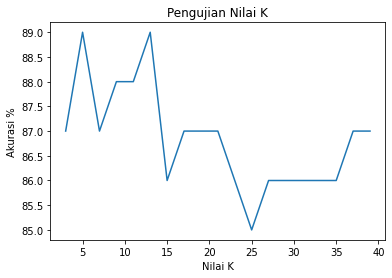

In [ ]:
import matplotlib.pyplot as plt
   
k = np.array([x for x in range(3,40,2)]) 
  
plt.plot(k, list_akurasi)
plt.title('Pengujian Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi %')
plt.show()

###Pengujian Nilai M

In [ ]:
akurasiM = []
for i in range(2,11):
  prediksiM = fuzzy(5, i, data_latih, label_latih, data_uji)
  akurasiM.append(accuration(label_uji, prediksiM))

In [ ]:
akurasiM

In [ ]:
import matplotlib.pyplot as plt
   
m = np.array([x for x in range(2,11)]) 
  
plt.plot(m, akurasiM,color='green',marker='o' )
plt.title('Pengujian Nilai M')
plt.xlabel('Nilai M')
plt.ylabel('Akurasi')
plt.show()

###Pengujian KNN dan Fuzzy KNN

In [ ]:
list_akurasik = []
for i in range(3, 40, 2):
  kelas = knn_multi(i, data_latih, label_latih, data_uji)
  akurasik = accuration(label_uji, kelas)
  list_akurasik.append(akurasik)

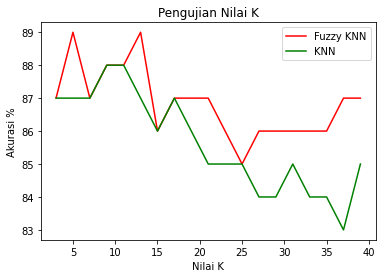

In [ ]:
import matplotlib.pyplot as plt
   
k = np.array([x for x in range(3,40,2)]) 
  
plt.plot(k, list_akurasi,color='red', label='Fuzzy KNN')
plt.plot(k, list_akurasik, color='green', label='KNN')
plt.title('Pengujian Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi %')
plt.legend(loc="upper right")
plt.show()